In [7]:
# Khai báo các thư viện cần thiết
from new_import import *

In [8]:
# Khai báo đường dẫn đến kết quả phân loại và kết quả thực tế của địa phương
KD_path = "ThuanHoa/KhoanhDat/ThuanHoa_TKDD2022.shp"
KetQuaPhanLoaiDat = "KetQuaPhanLoaiDat_15-09.tif"

In [114]:
# khai báo các loại đất ứng với các mã đất phân loại được
CODE_MAP = {
    "BHK": 2,
    "CLN": 3,
    "DGD": 6,
    "DGT": 6,
    "DNL": 6,
    "DRA": 6,
    "DSH": 6,
    "DTL": 5,
    "DTS": 6,
    "DYT": 6,
    "LUC": 1,
    "NKH": 3,
    "NTD": 6,
    "NTS": 4,
    "ONT": 6,
    "SKC": 6,
    "SKX": 6,
    "SON": 5,
    "TMD": 6,
    "TON": 6,
    "TSC": 6,
}

label_mapping = {
    "Lua tom": 0,
    "Lua": 1,
    "CHN": 2,
    "CLN": 3,
    "TS": 4,
    "Song": 5,
    "Dat xay dung": 6,
    "Rung": 7
}

# Khai báo các nhãn phân loại đất ứng với 3 loại đất chính
HT_MAP = {
    "NN": {"name": "Đất Nông Nghiệp", "data": [1, 2, 3, 4]},
    "PNN": {"name": "Đất Phi Nông Nghiệp", "data": [6]},
    "TQ": {"name": "Đất Thổ Quả", "data": [15]},
}

In [113]:
print(label_mapping.get(2))

None


In [126]:
import geopandas as gpd
import rioxarray
import numpy as np

def test(KD_path, KetQuaPhanLoaiDat, CODE_MAP, label_mapping):
    gdf = gpd.read_file(KD_path, crs="EPSG:9209")
    polygon = gdf.geometry.values
    label_before = gdf.tenchu.values
    output_image = rioxarray.open_rasterio(KetQuaPhanLoaiDat)
    
    array_list = []
    result = []  # Mảng để lưu thông tin về các điểm thay đổi

    for i in range(len(polygon)):
        po = polygon[i]
        lb_before = label_before[i]  # Lấy label từ KD_path
        code_lb = CODE_MAP.get(lb_before, 15)
        
        try:
            # Cắt ảnh theo hình đa giác
            qr = output_image.rio.clip([po], "EPSG:9209")
            # Tìm các điểm thay đổi
            changed_points = qr.where(qr != float(code_lb), np.nan)

            # Kiểm tra có điểm nào thay đổi không
            if changed_points.notnull().any():  # Nếu có giá trị không phải NaN
                # Lấy label từ KetQuaPhanLoaiDat
                label_after = qr.where(changed_points.notnull()).values.flatten()

                for value in label_after:
                    if not np.isnan(value):
                        label_after_key = [key for key, val in label_mapping.items() if val == int(value)]
                        label_after_key = label_after_key[0] if label_after_key else None
                        # Lưu lại thông tin label trước và sau
                        result.append({
                            'label_before': lb_before,  # Label từ KD_path
                            'label_after': label_after_key  # Giá trị tại điểm thay đổi từ KetQuaPhanLoaiDat
                        })
                
            array_list.append(changed_points)
        except Exception as e:
            pass

    return array_list, result


In [ ]:
# Tiến hành chồng lắp
array_list, result = test(KD_path, KetQuaPhanLoaiDat, CODE_MAP, label_mapping)

In [117]:
result

[{'label_before': 'SKC', 'label_after': 'CHN'},
 {'label_before': 'SKC', 'label_after': 'CHN'},
 {'label_before': 'SKC', 'label_after': 'CHN'},
 {'label_before': 'SKC', 'label_after': 'CHN'},
 {'label_before': 'SKC', 'label_after': 'CLN'},
 {'label_before': 'SKC', 'label_after': 'CLN'},
 {'label_before': 'SKC', 'label_after': 'CHN'},
 {'label_before': 'SKC', 'label_after': 'CHN'},
 {'label_before': 'SKC', 'label_after': 'CLN'},
 {'label_before': 'SKC', 'label_after': 'CLN'},
 {'label_before': 'SKC', 'label_after': 'CLN'},
 {'label_before': 'SKC', 'label_after': 'CHN'},
 {'label_before': 'SKC', 'label_after': 'CHN'},
 {'label_before': 'SKC', 'label_after': 'CLN'},
 {'label_before': 'SKC', 'label_after': 'CLN'},
 {'label_before': 'SKC', 'label_after': 'CLN'},
 {'label_before': 'SKC', 'label_after': 'CLN'},
 {'label_before': 'SKC', 'label_after': 'CLN'},
 {'label_before': 'SKC', 'label_after': 'Lua'},
 {'label_before': 'SKC', 'label_after': 'CHN'},
 {'label_before': 'SKC', 'label_after': 

In [118]:
rs = merge_arrays(array_list, nodata = np.nan)

In [119]:
rs

<xarray.DataArray (band: 1, y: 484, x: 791)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * x            (x) float64 5.952e+05 5.952e+05 ... 6.031e+05 6.031e+05
  * y            (y) float64 1.072e+06 1.072e+06 ... 1.067e+06 1.067e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     nan

In [120]:
save_path = "ThuanHoa/KetQuaMoi"

In [121]:
if not os.path.exists(save_path):
        os.mkdir(save_path)
rs.rio.to_raster(f"{save_path}/ChongLap_test.tif")
print(f"save {save_path}/ChongLap_test.tif")

save ThuanHoa/KetQuaMoi/ChongLap_test.tif


In [122]:
# cấu hình màu cho các loại đất
colors = [
    "#abcee9",
    "#ffef44",
    "#c4ff9e",
    "#ffd6a8",
    "#93ddda",
    "#1aeef7",
    "#ffa7f2",
    "#33ee33"
]
labels = [
    "Lúa tôm",
    "Lúa",
    "CHN",
    "CLN",
    "TS",
    "Sông",
    "Đất xây dựng",
    "Rừng"
]

/tmp/ipykernel_180/1556837544.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(labels)


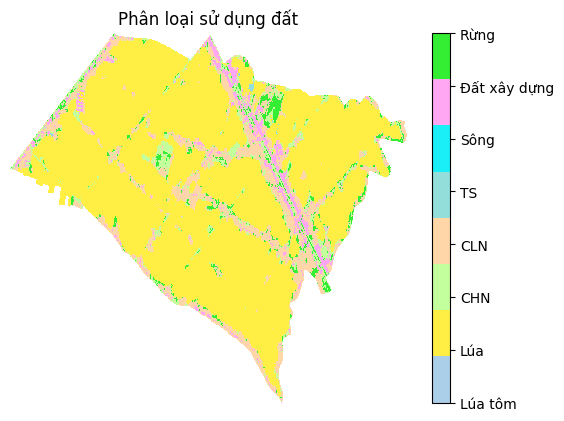

In [123]:
# hiển thị phân loại sử dụng đất
cmap = ListedColormap(colors)
img = rs.plot(cmap=cmap, add_colorbar=False)
cbar = plt.colorbar(img)
cbar.ax.set_yticklabels(labels)
plt.title("Phân loại sử dụng đất")
plt.axis('off')
plt.show()